# Muhammad Zeerak Khan
# Data Science and Business Analyst
# Task1 
# Student's Score Prediction using Supervised Machine Learning

# Import Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Dataset

In [5]:
df=pd.read_csv("http://bit.ly/w-data")

# Examining the Data

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#  Checking for Null values

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As depicted, the data doesn't contain any null values

# Data visualization

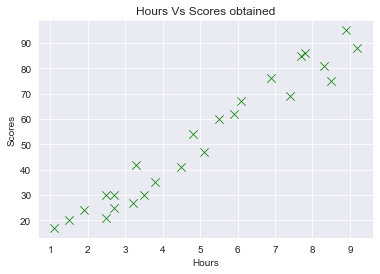

In [10]:
sns.set_style("darkgrid")
sns.scatterplot(data=df,x='Hours',y='Scores',s=70,marker='x',color='green').set(title="Hours Vs Scores obtained")
plt.show()

The scatter a postive linear correlation between Hours and the scores obtained

# Feature Extraction

In [11]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values


# Cross Validation

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Training

In [14]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()
r.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plotting the Regression

In [15]:
a=r.coef_
b=r.intercept_
print(a,b)

[9.68207815] 2.826892353899737


In [16]:
line=a*x+b

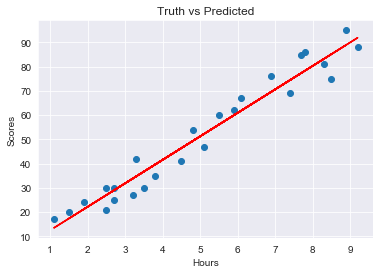

In [17]:
plt.scatter(x,y)
plt.plot(x,line,color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Truth vs Predicted')
plt.show()

# Making predictions

In [18]:
Y_pred=r.predict(X_test)

In [19]:
prediction_data=pd.DataFrame({'Truth':Y_test,'Predicted':Y_pred})

In [20]:
Hours_studied=[[9.25]]
result=r.predict(Hours_studied)
print(f'Students who study {Hours_studied} hours per day , secure {result[0]} marks')

Students who study [[9.25]] hours per day , secure 92.38611528261494 marks


# Model evaluation

In [21]:
from sklearn import metrics
print('Mean Absolute Error :',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error is :',metrics.mean_squared_error(Y_test,Y_pred))
print('Root of Mean Squared Error :',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean Absolute Error : 3.9207511902099244
Mean Squared Error is : 18.943211722315272
Root of Mean Squared Error : 4.352380006653288
